In this notebook, all noise data of La Filosofia and all weather data of LC-105 are merged at 1 observation per 10 minutes and exported to csv.

Necessary packages are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("E:\MDA 2023\Full noise data\Jan\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df1 = df1[['result_timestamp','laeq']]
df2 = pd.read_csv("E:\MDA 2023\Full noise data\Feb\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df2 = df2[['result_timestamp','laeq']]
df3 = pd.read_csv("E:\MDA 2023\Full noise data\March\csv_results_44_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df3 = df3[['result_timestamp','laeq']]
df4 = pd.read_csv("E:\MDA 2023\Full noise data\April\csv_results_45_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df4 = df4[['result_timestamp','laeq']]
df5 = pd.read_csv("E:\MDA 2023\Full noise data\May\csv_results_46_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df5 = df5[['result_timestamp','laeq']]
df6 = pd.read_csv("E:\MDA 2023\Full noise data\June\csv_results_47_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df6 = df6[['result_timestamp','laeq']]
df7 = pd.read_csv("E:\MDA 2023\Full noise data\Jul\csv_results_48_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df7 = df7[['result_timestamp','laeq']]
df8 = pd.read_csv("E:\MDA 2023\Full noise data\Aug\csv_results_49_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df8 = df8[['result_timestamp','laeq']]
df9 = pd.read_csv("E:\MDA 2023\Full noise data\Sep\csv_results_50_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df9 = df9[['result_timestamp','laeq']]
df10 = pd.read_csv("E:\MDA 2023\Full noise data\Oct\csv_results_51_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df10 = df10[['result_timestamp','laeq']]
df11 = pd.read_csv("E:\MDA 2023\Full noise data\\Nov\csv_results_52_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df11 = df11[['result_timestamp','laeq']]
df12 = pd.read_csv("E:\MDA 2023\Full noise data\Dec\csv_results_53_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df12 = df12[['result_timestamp','laeq']]
dfn = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0)

Noise data is converted to a Pandas datetime object and set as the index, to allow resampling to 1 observation per 10 minutes.

In [3]:
dfn['result_timestamp'] = pd.to_datetime(dfn['result_timestamp'], format="%d/%m/%Y %H:%M:%S.%f")

In [4]:
dfn.set_index('result_timestamp', inplace=True)
dfn = dfn.resample('10T').mean()

Next, the index is reset to default, so that time features can be extracted: hour, day of week, day of month, month, and weekend

In [5]:
dfn = dfn.reset_index()
dfn

,result_timestamp,laeq
0,2022-01-01 00:00:00,54.790667
1,2022-01-01 00:10:00,48.605833
2,2022-01-01 00:20:00,54.277833
3,2022-01-01 00:30:00,50.025333
4,2022-01-01 00:40:00,48.907333
...,...,...
52555,2022-12-31 23:10:00,52.203333
52556,2022-12-31 23:20:00,54.622833
52557,2022-12-31 23:30:00,56.135667
52558,2022-12-31 23:40:00,59.380333


In [6]:
dfn['hour'] = dfn['result_timestamp'].dt.hour.astype('int64')
dfn['day'] = dfn['result_timestamp'].dt.dayofweek.astype('int64')
dfn['day_of_month'] = dfn['result_timestamp'].dt.day.astype('int64')
dfn['month'] = dfn['result_timestamp'].dt.month.astype('int64')
def weekend_column(df):
    is_weekend=lambda x: 1 if x==5 or x==6 else 0
    df["weekend"]=df["day"].apply(is_weekend)
    return(df)
dfn=weekend_column(dfn)

The weather data from station LC-105 is loaded and merged. A number of unnecessary columns is left out ("ID","Date","Year","Month","Day","Hour","Minute").

In [7]:
#get weather data
dfw1 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q1.csv")
dfw1 = dfw1[dfw1['ID'] == 'LC-105']
dfw2 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q2.csv")
dfw2 = dfw2[dfw2['ID'] == 'LC-105']
dfw3 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q3.csv")
dfw3 = dfw3[dfw3['ID'] == 'LC-105']
dfw4 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q4.csv")
dfw4 = dfw4[dfw4['ID'] == 'LC-105']
dfw = pd.concat([dfw1,dfw2,dfw3,dfw4],axis=0)
dfw = dfw[['DATEUTC', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN','LC_WINDDIR',
          'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3']]

'DATEUTC' is renamed to 'result_timestamp' and converted to Pandas datetime column, for easy merging with the noise data.
Observations with missing values for LC_HUMIDITY, laeq, LC_TEMP_QCL1, LC_TEMP_QCL2, and LC_TEMP_QCL3 are left out.

In [8]:
dfw['result_timestamp'] = dfw['DATEUTC']
dfw = dfw.drop(['DATEUTC'], axis=1)
dfw['result_timestamp'] = pd.to_datetime(dfw['result_timestamp'],format="%Y-%m-%d %H:%M:%S")

Noise and weather data are merged.

In [11]:
df = pd.merge(dfn,dfw,on='result_timestamp', validate="1:1")

Missing values are assessed and observations with missings are deleted

In [12]:
df.isnull().sum()

result_timestamp     0
laeq                84
hour                 0
day                  0
day_of_month         0
month                0
weekend              0
LC_HUMIDITY          6
LC_DWPTEMP           6
LC_n                 6
LC_RAD               6
LC_RAININ            6
LC_DAILYRAIN         6
LC_WINDDIR           6
LC_WINDSPEED         6
LC_RAD60             0
LC_TEMP_QCL0         6
LC_TEMP_QCL1        60
LC_TEMP_QCL2        60
LC_TEMP_QCL3        60
dtype: int64

In [13]:
df=df[df.isnull()['laeq']==False]
df=df[df.isnull()['LC_HUMIDITY']==False]
df=df[df.isnull()['LC_TEMP_QCL1']==False]

In [14]:
df.isnull().sum()

result_timestamp    0
laeq                0
hour                0
day                 0
day_of_month        0
month               0
weekend             0
LC_HUMIDITY         0
LC_DWPTEMP          0
LC_n                0
LC_RAD              0
LC_RAININ           0
LC_DAILYRAIN        0
LC_WINDDIR          0
LC_WINDSPEED        0
LC_RAD60            0
LC_TEMP_QCL0        0
LC_TEMP_QCL1        0
LC_TEMP_QCL2        0
LC_TEMP_QCL3        0
dtype: int64

Dataframe is visualized for final check.

In [15]:
df

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,48.605833,0,5,1,1,1,91.0,11.88,38.0,0.0,0.0,0.0,-48.0,0.04,0.0,13.28,13.28,13.223,13.23639
1,2022-01-01 00:20:00,54.277833,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,45.0,0.02,0.0,13.28,13.28,13.223,13.16699
2,2022-01-01 00:30:00,50.025333,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,-52.0,0.04,0.0,13.28,13.28,13.223,13.19886
3,2022-01-01 00:40:00,48.907333,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,34.0,0.02,0.0,13.28,13.28,13.223,13.16699
4,2022-01-01 00:50:00,47.905000,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.223,13.09212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,2022-12-31 23:10:00,52.203333,23,5,31,12,1,52.0,6.79,38.0,0.0,0.0,0.0,-9.0,0.40,0.0,16.61,16.61,16.553,16.52797
52555,2022-12-31 23:20:00,54.622833,23,5,31,12,1,52.0,6.74,38.0,0.0,0.0,0.0,5.0,0.29,0.0,16.61,16.61,16.553,16.57995
52556,2022-12-31 23:30:00,56.135667,23,5,31,12,1,52.0,6.62,37.0,0.0,0.0,0.0,-17.0,0.15,0.0,16.51,16.51,16.453,16.44846
52557,2022-12-31 23:40:00,59.380333,23,5,31,12,1,52.0,6.60,38.0,0.0,0.0,0.0,-31.0,0.29,0.0,16.49,16.49,16.433,16.46641


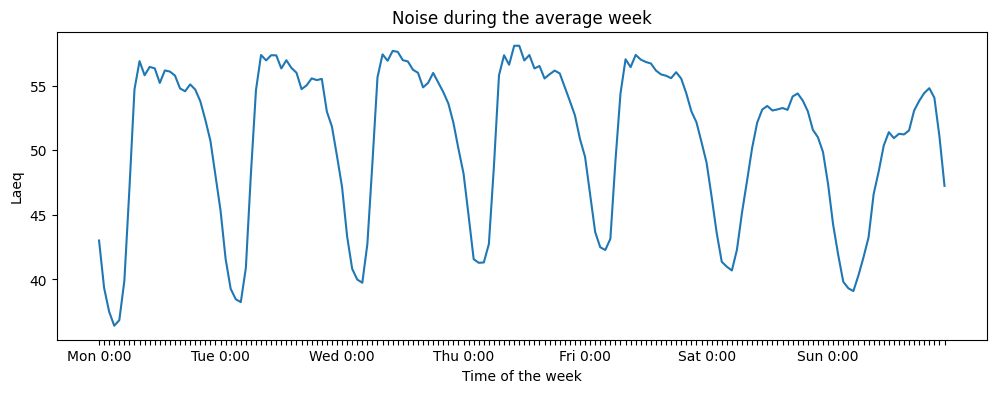

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_noise = df.groupby(["day", "hour"])["laeq"].mean()
average_week_noise.plot(ax=ax)
_ = ax.set(
    title="Noise during the average week",
    xticks=range(168),
    xticklabels=["Mon 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Tue 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Wed 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Thu 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Fri 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sat 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sun 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                ],
    xlabel="Time of the week",
    ylabel="Laeq",
)

fig.savefig("Noise_average_week_feb2.png")

Dataframe is exported as csv file.

In [16]:
df.to_csv('MDA_dataframeArthur.csv')